# Python Programming Final Project

-Nidhi Shyamsundar Berde
-Samyak Meshram

## State of Data

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Read the csv file
#We are using the cleaned dataset from the midterm project.

data = pd.read_csv('drive/My Drive/cleaned_data.csv',low_memory=False)

In [5]:
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_DESC,...,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,220674508,2018-01-02 00:00:00,1900-01-01 06:03:00,2018-01-03 00:00:00,1900-01-01 02:50:00,110.0,2018-01-03 00:00:00,341,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",...,RESIDENCE-HOUSE,UNKNOWN,UNKNOWN,UNKNOWN,40.750711,-73.853529,PATROL BORO QUEENS NORTH,25-44,WHITE HISPANIC,MALE
1,303569051,2018-01-02 00:00:00,1900-01-01 19:00:00,2018-01-02 00:00:00,1900-01-01 19:00:00,14.0,2018-01-03 00:00:00,341,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",...,RESTAURANT/DINER,UNKNOWN,UNKNOWN,UNKNOWN,40.749420,-73.983851,PATROL BORO MAN SOUTH,18-24,ASIAN / PACIFIC ISLANDER,MALE
2,151344389,2018-01-02 00:00:00,1900-01-01 12:00:00,2018-01-16 00:00:00,1900-01-01 12:13:00,70.0,2018-01-16 00:00:00,341,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",...,CHECK CASHING BUSINESS,UNKNOWN,UNKNOWN,UNKNOWN,40.616318,-73.961605,PATROL BORO BKLYN SOUTH,UNKNOWN,UNKNOWN,BUSINESS/ORGANIZATION
3,350251395,2018-01-02 00:00:00,1900-01-01 01:00:00,2018-01-02 00:00:00,1900-01-01 01:35:00,72.0,2018-01-02 00:00:00,113,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,STREET,18-24,BLACK,MALE,40.643678,-74.015492,PATROL BORO BKLYN SOUTH,UNKNOWN,UNKNOWN,UNKNOWN
4,249134413,2018-01-02 00:00:00,1900-01-01 18:21:00,2018-01-02 00:00:00,1900-01-01 18:41:00,41.0,2018-01-02 00:00:00,359,OFFENSES AGAINST PUBLIC ADMINI,"CONTEMPT,CRIMINAL",...,RESIDENCE - APT. HOUSE,45-64,BLACK,MALE,40.816122,-73.897757,PATROL BORO BRONX,45-64,WHITE HISPANIC,FEMALE


In [ ]:
#checking for nulls in data
data.isnull().sum()

CMPLNT_NUM           0
CMPLNT_FR_DT         0
CMPLNT_FR_TM         0
CMPLNT_TO_DT         0
CMPLNT_TO_TM         0
ADDR_PCT_CD          0
RPT_DT               0
KY_CD                0
OFNS_DESC            0
PD_DESC              0
CRM_ATPT_CPTD_CD     0
LAW_CAT_CD           0
BORO_NM              0
LOC_OF_OCCUR_DESC    0
PREM_TYP_DESC        0
SUSP_AGE_GROUP       0
SUSP_RACE            0
SUSP_SEX             0
Latitude             0
Longitude            0
PATROL_BORO          0
VIC_AGE_GROUP        0
VIC_RACE             0
VIC_SEX              0
dtype: int64

In [ ]:
#checking the data number of rows and columns
data.shape


(1768072, 24)

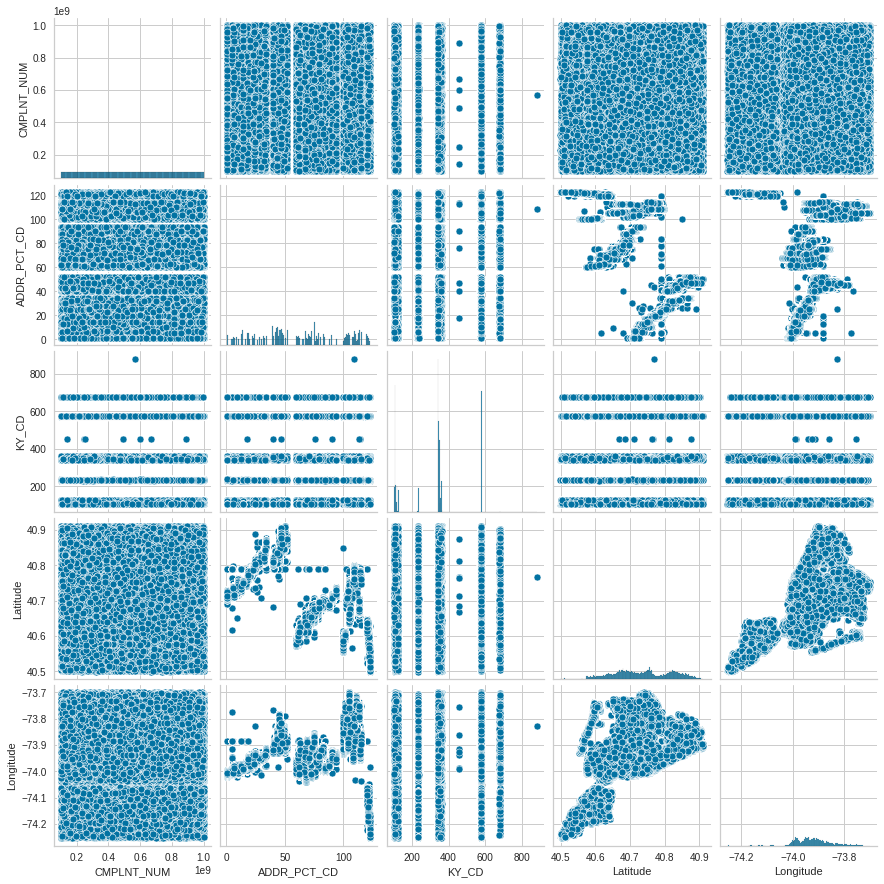

In [6]:
sns.pairplot(data)

In [ ]:
data.dtypes


CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
SUSP_AGE_GROUP        object
SUSP_RACE             object
SUSP_SEX              object
Latitude             float64
Longitude            float64
PATROL_BORO           object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX               object
dtype: object

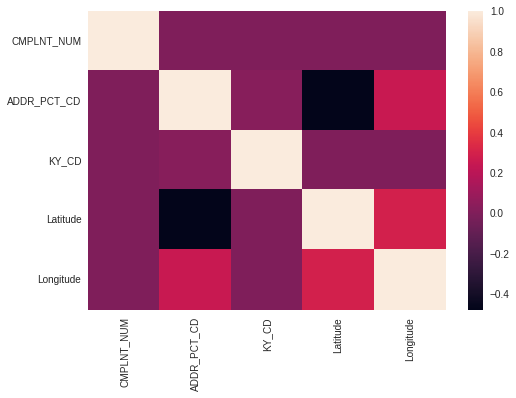

In [ ]:
#Diplay the corelation between the values
f= sns.heatmap(data.corr())

this here is a problem most of our features which are categorical in nature are being ignored, which might be bad for our classifier.

## Preprocessing

In [9]:
#split the numerical columns into another dataframe
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
numerical_columns.shape

(1768072, 5)

In [10]:
numerical_columns.head()

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,Latitude,Longitude
0,220674508,110.0,341,40.750711,-73.853529
1,303569051,14.0,341,40.749420,-73.983851
2,151344389,70.0,341,40.616318,-73.961605
3,350251395,72.0,113,40.643678,-74.015492
4,249134413,41.0,359,40.816122,-73.897757


In [11]:
#split the categorical data into another dataframe
categorical_columns = data.select_dtypes(include=['object', 'category'])
categorical_columns

,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,2018-01-02 00:00:00,1900-01-01 06:03:00,2018-01-03 00:00:00,1900-01-01 02:50:00,2018-01-03 00:00:00,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,QUEENS,INSIDE,RESIDENCE-HOUSE,UNKNOWN,UNKNOWN,UNKNOWN,PATROL BORO QUEENS NORTH,25-44,WHITE HISPANIC,MALE
1,2018-01-02 00:00:00,1900-01-01 19:00:00,2018-01-02 00:00:00,1900-01-01 19:00:00,2018-01-03 00:00:00,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESTAURANT/DINER,UNKNOWN,UNKNOWN,UNKNOWN,PATROL BORO MAN SOUTH,18-24,ASIAN / PACIFIC ISLANDER,MALE
2,2018-01-02 00:00:00,1900-01-01 12:00:00,2018-01-16 00:00:00,1900-01-01 12:13:00,2018-01-16 00:00:00,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,BROOKLYN,FRONT OF,CHECK CASHING BUSINESS,UNKNOWN,UNKNOWN,UNKNOWN,PATROL BORO BKLYN SOUTH,UNKNOWN,UNKNOWN,BUSINESS/ORGANIZATION
3,2018-01-02 00:00:00,1900-01-01 01:00:00,2018-01-02 00:00:00,1900-01-01 01:35:00,2018-01-02 00:00:00,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BROOKLYN,UNKNOWN,STREET,18-24,BLACK,MALE,PATROL BORO BKLYN SOUTH,UNKNOWN,UNKNOWN,UNKNOWN
4,2018-01-02 00:00:00,1900-01-01 18:21:00,2018-01-02 00:00:00,1900-01-01 18:41:00,2018-01-02 00:00:00,OFFENSES AGAINST PUBLIC ADMINI,"CONTEMPT,CRIMINAL",COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,45-64,BLACK,MALE,PATROL BORO BRONX,45-64,WHITE HISPANIC,FEMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768067,2021-12-31 00:00:00,1900-01-01 11:53:00,2021-12-31 00:00:00,1900-01-01 12:20:00,2021-12-31 00:00:00,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,45-64,BLACK,FEMALE,PATROL BORO BKLYN NORTH,25-44,BLACK,FEMALE
1768068,2021-12-31 00:00:00,1900-01-01 03:40:00,2021-12-31 00:00:00,1900-01-01 03:50:00,2021-12-31 00:00:00,ROBBERY,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,FRONT OF,STREET,18-24,WHITE HISPANIC,MALE,PATROL BORO BKLYN SOUTH,25-44,WHITE HISPANIC,MALE
1768069,2021-12-31 00:00:00,1900-01-01 19:45:00,2021-12-31 00:00:00,1900-01-01 20:00:00,2021-12-31 00:00:00,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,QUEENS,INSIDE,LIQUOR STORE,UNKNOWN,WHITE HISPANIC,MALE,PATROL BORO QUEENS NORTH,UNKNOWN,UNKNOWN,BUSINESS/ORGANIZATION
1768070,2021-12-31 00:00:00,1900-01-01 09:35:00,2021-12-31 00:00:00,1900-01-01 09:47:00,2021-12-31 00:00:00,GRAND LARCENY,"LARCENY,GRAND FROM STORE-SHOPL",COMPLETED,FELONY,QUEENS,INSIDE,DEPARTMENT STORE,18-24,BLACK,MALE,PATROL BORO QUEENS NORTH,UNKNOWN,UNKNOWN,BUSINESS/ORGANIZATION


In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()


In [13]:
# use labelling for each column to turn this categorical data into numerical data
labeled_df = pd.DataFrame()

for feature in categorical_columns.columns:
  le.fit(data[feature])
  ldata = le.transform(data[feature])
  labeled_df[feature] = pd.Series(ldata)

In [14]:
labeled_df.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,0,363,5,171,1,53,202,1,1,3,1,55,61,4,2,5,54,6,2
1,0,1140,4,1141,1,53,202,1,1,2,1,56,61,4,2,4,53,1,2
2,0,720,18,734,14,53,202,1,1,1,0,15,61,4,2,1,80,4,0
3,0,60,4,96,0,20,109,1,0,1,4,62,35,2,1,1,80,4,3
4,0,1101,4,1122,0,43,65,1,1,0,1,53,43,2,1,2,55,6,1


In [15]:
labeled_df.shape

(1768072, 19)

In [16]:
#merge the two dataframes

new_df = pd.merge(labeled_df, numerical_columns, left_index=True, right_index=True)

In [17]:
new_df.shape

(1768072, 24)

In [ ]:
sns.pairplot(new_df)

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = new_df.corr()
g=sns.heatmap(cor, vmin=cor.values.min(), 
              vmax=1, square=True, cmap="YlGnBu", linewidths=0.1, 
              annot=True, annot_kws={"fontsize":10},
              xticklabels=1, yticklabels=1) 
plt.show()


# Finding what offense was commited based on data

## feature selection, splitting data into training and test splits

In [ ]:
Classes = new_df["OFNS_DESC"].unique()
Classes.shape

(66,)

In [ ]:
#Correlation with output variable
cor_target = abs(cor['OFNS_DESC'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.015]
relevant_features

CMPLNT_FR_TM        0.015291
CMPLNT_TO_DT        0.015549
CMPLNT_TO_TM        0.034940
RPT_DT              0.016155
OFNS_DESC           1.000000
PD_DESC             0.433211
CRM_ATPT_CPTD_CD    0.030980
LAW_CAT_CD          0.056465
BORO_NM             0.033658
PREM_TYP_DESC       0.163324
SUSP_AGE_GROUP      0.101863
SUSP_SEX            0.083929
PATROL_BORO         0.017037
VIC_AGE_GROUP       0.066386
VIC_RACE            0.019617
VIC_SEX             0.198962
ADDR_PCT_CD         0.024933
KY_CD               0.051009
Latitude            0.015496
Longitude           0.032924
Name: OFNS_DESC, dtype: float64

In [ ]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = [ "CRM_ATPT_CPTD_CD", "LAW_CAT_CD", 'BORO_NM', "PREM_TYP_DESC", #"PD_DESC"
            "SUSP_AGE_GROUP", "SUSP_RACE", "SUSP_SEX", "PATROL_BORO", "VIC_AGE_GROUP",
            "VIC_RACE", "VIC_SEX", "ADDR_PCT_CD"]
print('Full Features: ', Features)

Full Features:  ['CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'ADDR_PCT_CD']


In [ ]:
Target = 'OFNS_DESC'
print('Target: ', Target)

Target:  OFNS_DESC


In [ ]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(new_df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

In [ ]:
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Training Set Size   :  (1414457, 24)
Test Set Size       :  (353615, 24)


## Using KNN Classifier

In [ ]:
# K-Nearest Neighbors
# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=5)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features]) 

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== K-Nearest Neighbors Results ==========
Accuracy    :  0.5465661807332833
Recall      :  0.5465661807332833
Precision   :  0.5323236755814913
F1 Score    :  0.5465661807332833
Confusion Matrix: 
[[  0   0   0 ...   0   0   0]
 [  0  26   0 ...   0   0   1]
 [  0   0   4 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0 710]]


## Using Decistion trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(x1, x2)
result = rfc.predict(y[Features])

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== Random Forest Results ==========
Accuracy    :  0.600721123255518
Recall      :  0.600721123255518
Precision   :  0.5739931989911011
F1 Score    :  0.600721123255518
Confusion Matrix: 
[[  0   0   0 ...   0   0   0]
 [  0  19   0 ...   1   0   1]
 [  0   0   4 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   1   0 ...   0   0 783]]


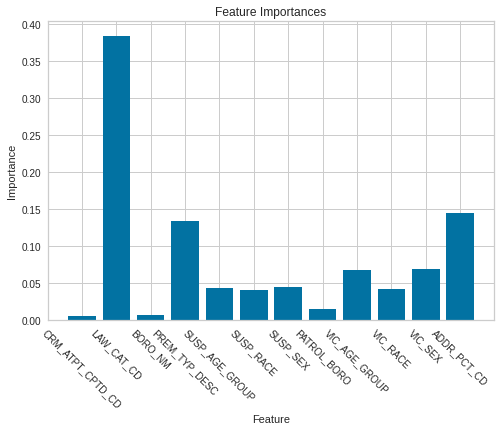

In [ ]:
# Plot the feature importances
plt.bar(Features, rfc.feature_importances_)
plt.xlabel('Feature', )
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=-45)
plt.show()

# prediciting what borough the crime was committed in based on the data

## feature selection, splitting data into training and test splits

In [ ]:
Classes = new_df["BORO_NM"].unique()
Classes.shape

(5,)

In [ ]:
#Correlation with output variable
cor_target = abs(cor['BORO_NM'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.016]
relevant_features

CMPLNT_TO_DT      0.071830
CMPLNT_TO_TM      0.070570
RPT_DT            0.016750
OFNS_DESC         0.033658
BORO_NM           1.000000
PREM_TYP_DESC     0.067180
SUSP_AGE_GROUP    0.025638
SUSP_RACE         0.022648
SUSP_SEX          0.023322
PATROL_BORO       0.819548
VIC_AGE_GROUP     0.017028
VIC_SEX           0.036408
ADDR_PCT_CD       0.468129
Latitude          0.423282
Longitude         0.088425
Name: BORO_NM, dtype: float64

In [ ]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["OFNS_DESC", "PREM_TYP_DESC",
            "SUSP_AGE_GROUP", "SUSP_RACE", "SUSP_SEX", "VIC_AGE_GROUP",
            "VIC_RACE", "VIC_SEX"]
print('Full Features: ', Features)

Full Features:  ['OFNS_DESC', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']


In [ ]:
Target = 'BORO_NM'
print('Target: ', Target)

Target:  BORO_NM


In [ ]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(new_df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

In [ ]:
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Training Set Size   :  (1414457, 24)
Test Set Size       :  (353615, 24)


## Using KNN

In [ ]:
# K-Nearest Neighbors
# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features]) 

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== K-Nearest Neighbors Results ==========
Accuracy    :  0.34080850642648075
Recall      :  0.34080850642648075
Precision   :  0.35181943332719057
F1 Score    :  0.34080850642648075
Confusion Matrix: 
[[38171 20527 10616  6851   462]
 [34514 36937 17105 11763  1346]
 [28395 24652 26500  6915   635]
 [22671 21599 10044 17463  1547]
 [ 3848  5294  1844  2472  1444]]


## Using Decision Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(x1, x2)
result = rfc.predict(y[Features])

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.4098072762750449
Recall      :  0.4098072762750449
Precision   :  0.41065043758577624
F1 Score    :  0.4098072762750449
Confusion Matrix: 
[[29972 25763 12519  7821   552]
 [16152 49709 20624 13668  1512]
 [14509 26186 38823  7078   501]
 [11718 22247 13253 24380  1726]
 [ 1692  5414  2342  3424  2030]]


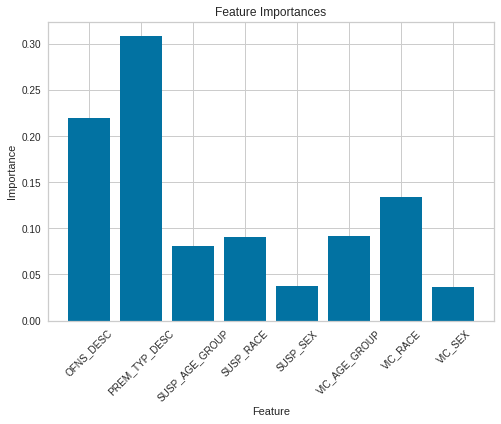

In [ ]:
# Plot the feature importances
plt.bar(Features, rfc.feature_importances_)
plt.xlabel('Feature', )
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()